# Problem Statement
Customer churn and engagement has become one of the top issues for most banks. It costs significantly more to acquire new customers than retain existing. It is of utmost important for a bank to retain its customers.  
 
We have a data from a MeBank (Name changed) which has a data of 7124 customers. In this data-set we have a dependent variable “Exited” and various independent variables.  
  
Based on the data, build a model to predict when the customer will exit the bank. Split the data into Train and Test dataset (70:30), build the model on Train data-set and test the model on Test-dataset. Secondly provide recommendations to the bank so that they can retain the customers who are on the verge of exiting.



# Data Dictionary
<b>CustomerID</b> - Bank ID of the Customer  
<b>Surname</b> - Customer’s Surname  
<b>CreditScore</b> - Current Credit score of the customer  
<b>Geography</b> - Current country of the customer  
<b>Gender</b> - Customer’s Gender  
<b>Age</b> - Customer’s Age  
<b>Tenure</b> - Customer’s duration association with bank in years  
<b>Balance</b> - Current balance in the bank account.  
<b>Num of Dependents</b> - Number of dependents  
<b>Has Crcard</b> - 1 denotes customer has a credit card and 0 denotes customer does not have a credit card  
<b>Is Active Member</b> - 1 denotes customer is an active member and 0 denotes customer is not an active member  
<b>Estimated Salary</b> - Customer’s approx. salary  
<b>Exited</b> - 1 denotes customer has exited the bank and 0 denotes otherwise  

## Load library and import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn=pd.read_csv("Churn_Modelling-1.csv")

## Inspect the data

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2.0,3000,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8.0,159660.8,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1.0,3000,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1,1.0,1.0,79084.10,0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          7124 non-null   int64  
 1   CustomerId         7124 non-null   int64  
 2   Surname            7124 non-null   object 
 3   Credit Score       7118 non-null   float64
 4   Geography          7120 non-null   object 
 5   Gender             7116 non-null   object 
 6   Age                7124 non-null   object 
 7   Tenure             7110 non-null   float64
 8   Balance            7121 non-null   object 
 9   Num of Dependents  7124 non-null   int64  
 10  Has CrCard         7111 non-null   float64
 11  Is Active Member   7114 non-null   float64
 12  Estimated Salary   7123 non-null   float64
 13  Exited             7124 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 779.3+ KB


Age and Balance variable has numeric data but data type is object.
Also there are missing values for some variables.

# EDA

## Removing unwanted variables

In [5]:
# remove the variables and check the data for the 10 rows 
churn = churn.drop(['RowNumber',
                    'CustomerId',
                    'Surname'], axis=1)
churn.head()

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,619.0,France,Female,42,2.0,3000,1,1.0,1.0,101348.88,1
1,608.0,Spain,Female,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,502.0,France,Female,42,8.0,159660.8,3,1.0,0.0,113931.57,1
3,699.0,France,Female,39,1.0,3000,2,0.0,0.0,93826.63,0
4,850.0,Spain,Female,43,2.0,125510.82,1,1.0,1.0,79084.10,0


Checking dimensions after removing unwanted variables,

In [6]:
churn.shape

(7124, 11)

## Summary

In [7]:
churn.describe().round(0)

,Credit Score,Tenure,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
count,7118.0,7110.0,7124.0,7111.0,7114.0,7123.0,7124.0
mean,650.0,5.0,2.0,1.0,0.0,100490.0,0.0
std,97.0,3.0,1.0,0.0,1.0,57560.0,0.0
min,350.0,0.0,1.0,0.0,0.0,12.0,0.0
25%,582.0,2.0,1.0,0.0,0.0,50993.0,0.0
50%,651.0,5.0,1.0,1.0,0.0,100637.0,0.0
75%,717.0,7.0,2.0,1.0,1.0,149592.0,1.0
max,850.0,10.0,4.0,1.0,1.0,199971.0,1.0


In [8]:
churn.shape

(7124, 11)

## Proportion of observations in Target classes

In [9]:
# Get the proportions
churn['Exited'].value_counts(normalize=True)

0    0.714065
1    0.285935
Name: Exited, dtype: float64

## Checking for Missing values

In [10]:
# Are there any missing values ?
churn.isnull().sum()

Credit Score          6
Geography             4
Gender                8
Age                   0
Tenure               14
Balance               3
Num of Dependents     0
Has CrCard           13
Is Active Member     10
Estimated Salary      1
Exited                0
dtype: int64

There are some missing values

## Checking for inconsistencies in Balance and Age variable

In [11]:
churn.Balance.sort_values()

5870    100013.51
5280    100032.52
5611    100047.33
2129    100054.77
6755    100116.67
          ...    
2700            ?
2702            ?
145           NaN
518           NaN
2692          NaN
Name: Balance, Length: 7124, dtype: object

There are cases where '?' is present and cases where missing values are present for Balance variable.  
Summary also proves the count of missing variables.  
To confirm on the count of ? we call value_counts().

In [13]:
# pd.options.display.max_rows =8000

In [15]:
churn.Balance.value_counts()

3000         2481
?               3
130170.82       2
146407.11       1
126315.26       1
167949.48       1
95624.36        1
81553.93        1
118214.32       1
154139.45       1
129109.02       1
123229.46       1
99095.73        1
106434.94       1
146011.4        1
118433.94       1
88084.13        1
113109.52       1
156371.61       1
149814.54       1
116969.35       1
136963.12       1
135139.33       1
141806.46       1
97495.8         1
152335.7        1
107850.82       1
115137.26       1
78990.15        1
161588.89       1
89492.62        1
185544.36       1
61211.18        1
42157.08        1
136596.85       1
149332.48       1
115961.58       1
161806.09       1
124857.69       1
104719.94       1
135559.8        1
38340.02        1
101827.07       1
170228.59       1
150302.84       1
115195.58       1
133199.71       1
123783.91       1
156773.78       1
159024.71       1
68881.59        1
125406.58       1
100900.5        1
118897.1        1
91246.53        1
143267.14 

In [16]:
churn[churn.Balance=="?"]

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
2700,564.0,France,Male,31,4.0,?,2,1.0,0.0,53520.03,0
2701,649.0,France,Female,31,2.0,?,2,1.0,0.0,15200.61,0
2702,622.0,France,Female,30,4.0,?,1,0.0,1.0,196894.62,0


This confirms there are 3 cases having ?

In [17]:
churn.Age.value_counts().sort_values()

81      1
?       1
88      1
82      1
85      1
80      2
78      2
84      2
79      4
77      5
75      7
76      7
73      9
70     12
18     13
72     14
74     14
65     15
68     15
69     15
71     19
19     21
67     24
20     25
64     27
66     28
63     31
21     39
61     42
62     43
60     49
59     50
58     53
56     60
22     61
57     63
53     65
23     68
54     69
55     72
52     89
24     91
51    103
50    104
25    106
49    119
47    134
27    134
26    138
48    141
46    172
28    177
45    182
44    192
30    215
43    219
29    240
42    243
41    261
31    279
32    287
34    287
40    289
39    290
36    296
33    301
35    322
38    326
37    337
Name: Age, dtype: int64

There is 1 case where ? is present

## Replacing ? as Nan in Age and Balance variable

In [18]:
churn.Balance = churn.Balance.replace(to_replace = '?', 
                                      value =np.nan)
churn.Age = churn.Age.replace(to_replace = '?', 
                              value =np.nan)

Verifying count of missing values for Age and Balance variable below:

In [19]:
churn.Balance.isnull().sum()

6

In [20]:
churn.Age.isnull().sum()

1

## Imputing missing values

First lets check if there are outliers before deciding on missing value imputation strategy.

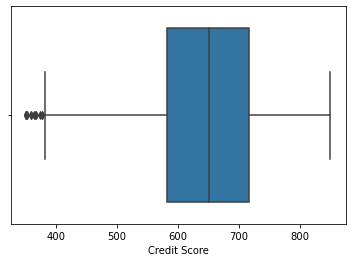

In [21]:
sns.boxplot(data=churn, x='Credit Score');

As Outliers are present in the "Credit Score", so we impute the null values by median

In [22]:
 churn['Credit Score'].fillna(churn['Credit Score'].median(),
                              inplace= True)

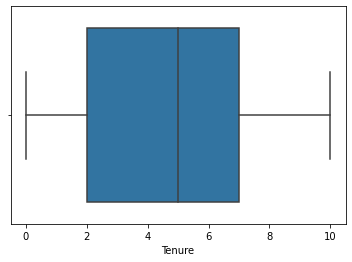

In [23]:
sns.boxplot(churn['Tenure']);

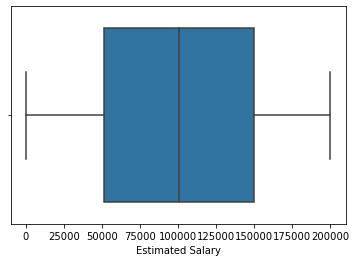

In [24]:
sns.boxplot(churn['Estimated Salary']);

Substituting the mean value for all other numeric variables

In [25]:
for column in churn[['Tenure', 'Estimated Salary']]:
    mean = churn[column].mean()
    churn[column] = churn[column].fillna(mean)

In [26]:
churn.isnull().sum()

Credit Score          0
Geography             4
Gender                8
Age                   1
Tenure                0
Balance               6
Num of Dependents     0
Has CrCard           13
Is Active Member     10
Estimated Salary      0
Exited                0
dtype: int64

## Converting Object data type into Categorical

In [27]:
for column in churn[['Geography','Gender',
                     'Has CrCard','Is Active Member']]:
    if churn[column].dtype == 'object':
        churn[column] = pd.Categorical(churn[column]).codes 

In [28]:
churn.head()

,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,619.0,1,1,42,2.0,3000,1,1.0,1.0,101348.88,1
1,608.0,3,1,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,502.0,1,1,42,8.0,159660.8,3,1.0,0.0,113931.57,1
3,699.0,1,1,39,1.0,3000,2,0.0,0.0,93826.63,0
4,850.0,3,1,43,2.0,125510.82,1,1.0,1.0,79084.10,0


In [29]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Credit Score       7124 non-null   float64
 1   Geography          7124 non-null   int8   
 2   Gender             7124 non-null   int8   
 3   Age                7123 non-null   object 
 4   Tenure             7124 non-null   float64
 5   Balance            7118 non-null   object 
 6   Num of Dependents  7124 non-null   int64  
 7   Has CrCard         7111 non-null   float64
 8   Is Active Member   7114 non-null   float64
 9   Estimated Salary   7124 non-null   float64
 10  Exited             7124 non-null   int64  
dtypes: float64(5), int64(2), int8(2), object(2)
memory usage: 514.9+ KB


## Substituting the mode value for all missing categorical variables

In [30]:
for column in churn[['Geography','Gender',
                     'Has CrCard','Is Active Member']]:
    mode = churn[column].mode()
    churn[column] = churn[column].fillna(mode[0])

In [31]:
churn.isnull().sum()

Credit Score         0
Geography            0
Gender               0
Age                  1
Tenure               0
Balance              6
Num of Dependents    0
Has CrCard           0
Is Active Member     0
Estimated Salary     0
Exited               0
dtype: int64

Age and Balance are still not addressed. Getting the mode value

In [32]:
churn['Balance'].mode()

0    3000
dtype: object

In [33]:
churn['Age'].mode()

0    37
dtype: object

Replacing nan with modal values,

In [34]:
churn['Balance']=churn['Balance'].fillna(3000)
churn['Age']=churn['Age'].fillna(37)

In [35]:
churn.isnull().sum()

Credit Score         0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
Num of Dependents    0
Has CrCard           0
Is Active Member     0
Estimated Salary     0
Exited               0
dtype: int64

There are no more missing values.

In [36]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Credit Score       7124 non-null   float64
 1   Geography          7124 non-null   int8   
 2   Gender             7124 non-null   int8   
 3   Age                7124 non-null   object 
 4   Tenure             7124 non-null   float64
 5   Balance            7124 non-null   object 
 6   Num of Dependents  7124 non-null   int64  
 7   Has CrCard         7124 non-null   float64
 8   Is Active Member   7124 non-null   float64
 9   Estimated Salary   7124 non-null   float64
 10  Exited             7124 non-null   int64  
dtypes: float64(5), int64(2), int8(2), object(2)
memory usage: 514.9+ KB


Age and Balance are still object, which has to be converted

## Converting Age and Balance to numeric variables

In [37]:
churn['Age'] = pd.to_numeric(churn['Age'])
churn['Balance'] = pd.to_numeric(churn['Balance'])

In [38]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Credit Score       7124 non-null   float64
 1   Geography          7124 non-null   int8   
 2   Gender             7124 non-null   int8   
 3   Age                7124 non-null   int64  
 4   Tenure             7124 non-null   float64
 5   Balance            7124 non-null   float64
 6   Num of Dependents  7124 non-null   int64  
 7   Has CrCard         7124 non-null   float64
 8   Is Active Member   7124 non-null   float64
 9   Estimated Salary   7124 non-null   float64
 10  Exited             7124 non-null   int64  
dtypes: float64(6), int64(3), int8(2)
memory usage: 514.9 KB


In [ ]:
# Alternate way to convert object datatype to numeric

# churn['Age']=churn['Age'].astype(str).astype(int)
# churn['Balance']=churn['Balance'].astype(str).astype(float)

## Checking for Duplicates

In [39]:
# Are there any duplicates ?
dups = churn.duplicated()
print(f'Number of duplicate rows = {dups.sum()}')
# churn[dups]

Number of duplicate rows = 0


There are no Duplicates

## Checking for Outliers

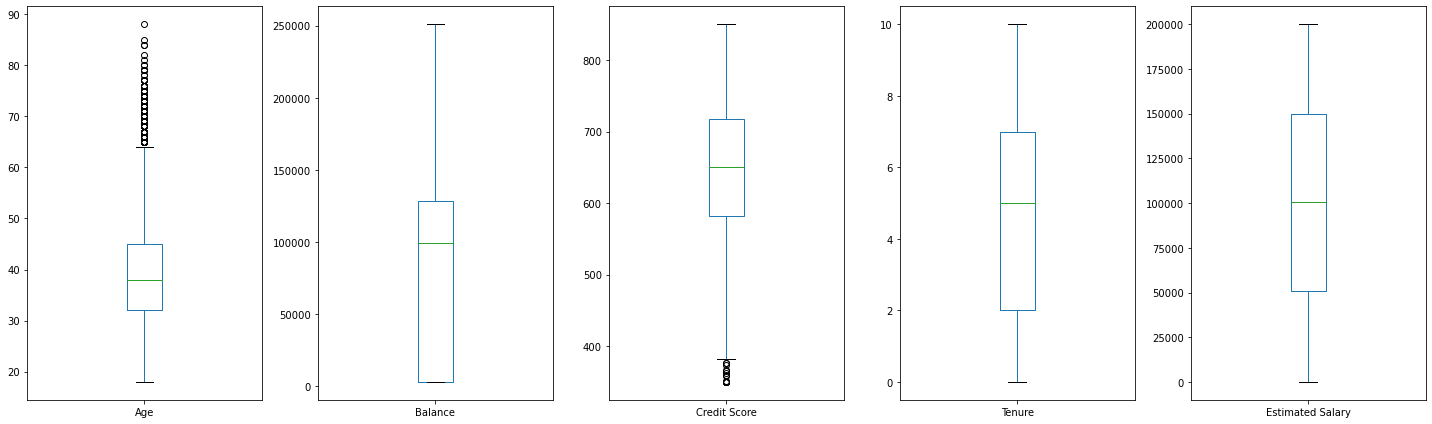

In [41]:
churn[['Age','Balance','Credit Score', 
       'Tenure', 'Estimated Salary']].plot(kind = 'box',
                                           subplots = True,
                                           figsize = (20,6));
plt.tight_layout();


## Checking pairwise distribution of the continuous variables

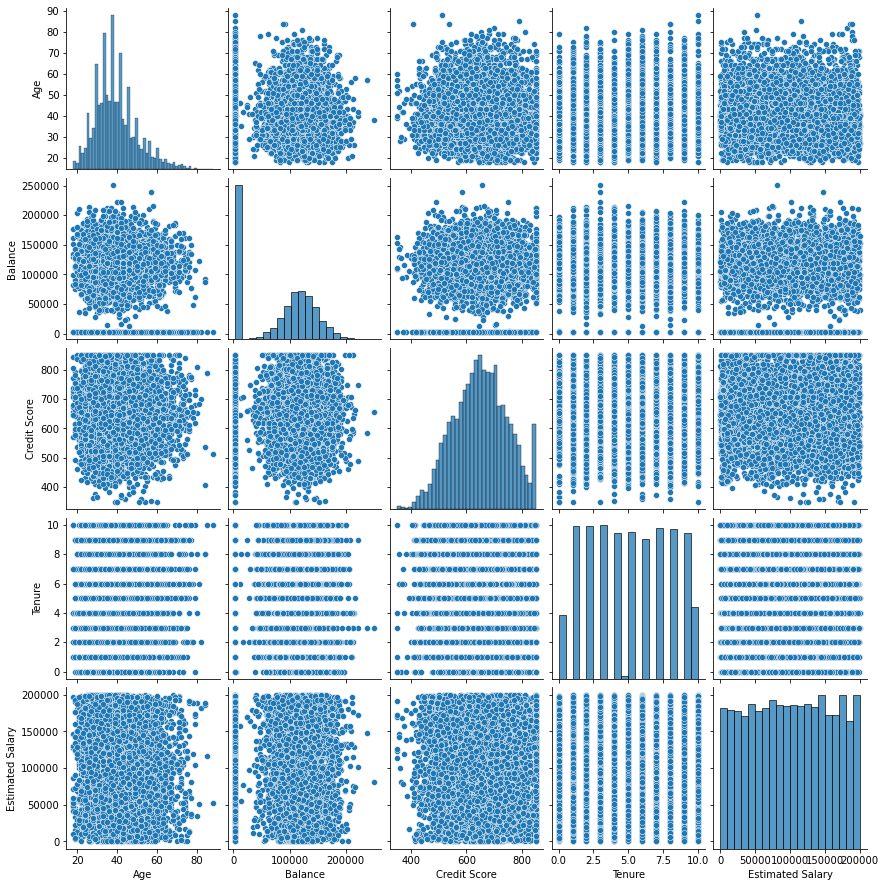

In [42]:
sns.pairplot(churn[['Age','Balance',
                    'Credit Score', 'Tenure', 
                    'Estimated Salary']]);

## Checking for Correlations

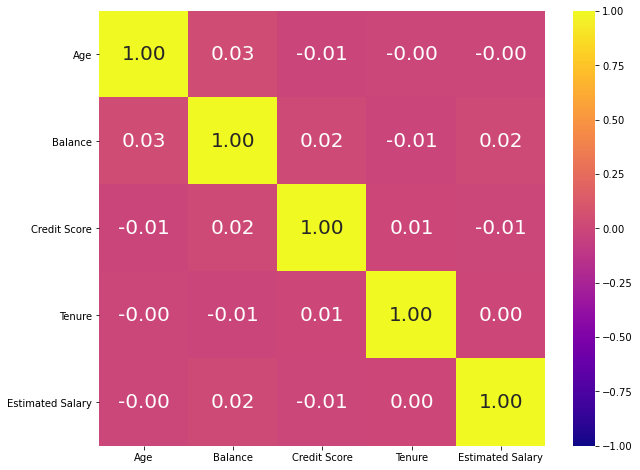

In [44]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.heatmap(churn[['Age','Balance',
                   'Credit Score', 'Tenure', 
                   'Estimated Salary']].corr(), annot=True,
           vmin = -1, vmax=1, cmap='plasma', fmt = '.2f',
           annot_kws= {'size': 20});
plt.yticks(rotation=0);

There is hardly any correlation between the variables

# Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
#Extract x and y
y = churn['Exited']
x = churn.drop(['Exited'], axis=1)

In [47]:
#split data into 70% training and 30% test data
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size= 0.30, 
                                                    random_state=0)

In [48]:
# Checking dimensions on the train and test data
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (4986, 10)
x_test:  (2138, 10)
y_train:  (4986,)
y_test:  (2138,)


# Scaling the variables

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [51]:
#Scale the training data
x_train = sc.fit_transform(x_train)

In [52]:
# Apply the transformation on the test data
x_test = sc.transform(x_test)

# Building Neural Network Model

In [53]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  
                    random_state=21,tol=0.01)

In [ ]:
# code for creating a MLP model object with 3 hidden layers of 100 nodes each

# clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=5000,
#                      solver='sgd', verbose=True,  
#                     random_state=21,tol=0.01)

In [54]:
# Fit the model on the training data
clf.fit(x_train, y_train)

Iteration 1, loss = 0.70312851
Iteration 2, loss = 0.64672002
Iteration 3, loss = 0.61042851
Iteration 4, loss = 0.58944784
Iteration 5, loss = 0.57647143
Iteration 6, loss = 0.56707747
Iteration 7, loss = 0.55992319
Iteration 8, loss = 0.55395940
Iteration 9, loss = 0.54883870
Iteration 10, loss = 0.54434205
Iteration 11, loss = 0.54032285
Iteration 12, loss = 0.53672452
Iteration 13, loss = 0.53339912
Iteration 14, loss = 0.53040388
Iteration 15, loss = 0.52771925
Iteration 16, loss = 0.52514199
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

## Predicting training data

In [55]:
# use the model to predict the training data
y_pred_train = clf.predict(x_train)

## Evaluating model performance on training data

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve,recall_score, accuracy_score

In [61]:
def eval_model(model,x,y,preds):
    print(f'Accuracy: {accuracy_score(y,preds)}')
    print(f'Recall: {recall_score(y,preds)}')
    plot_confusion_matrix(model,x,y)
    plt.show();
    plot_roc_curve(model,x,y)
    plt.show();
    print(classification_report(y,preds))

Accuracy: 0.7482952266345768
Recall: 0.16796598157335224


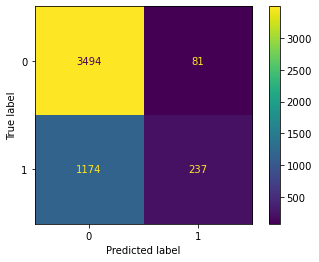

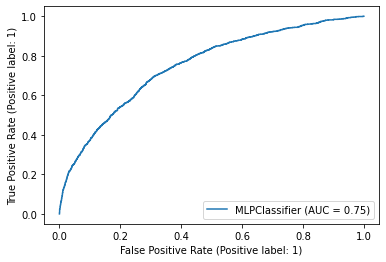

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      3575
           1       0.75      0.17      0.27      1411

    accuracy                           0.75      4986
   macro avg       0.75      0.57      0.56      4986
weighted avg       0.75      0.75      0.69      4986



In [62]:
eval_model(clf,x_train,y_train,y_pred_train)

## Predicting Test Data and comparing model performance

In [59]:
y_pred_test = clf.predict(x_test)

In [66]:
# prob_pred_test = clf.predict_proba(x_test)

In [68]:
# prob_pred_test[1:10]

array([[0.81264051, 0.18735949],
       [0.8934201 , 0.1065799 ],
       [0.65545444, 0.34454556],
       [0.85592634, 0.14407366],
       [0.52059227, 0.47940773],
       [0.81983572, 0.18016428],
       [0.74823109, 0.25176891],
       [0.55022401, 0.44977599],
       [0.69153693, 0.30846307]])

Accuracy: 0.7399438727782974
Recall: 0.17412140575079874


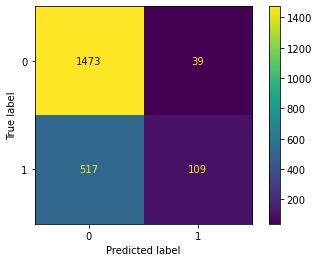

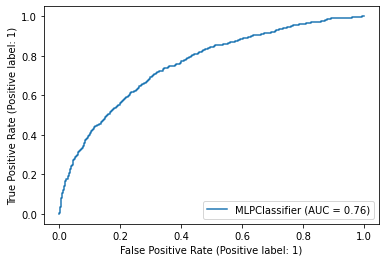

              precision    recall  f1-score   support

           0       0.74      0.97      0.84      1512
           1       0.74      0.17      0.28       626

    accuracy                           0.74      2138
   macro avg       0.74      0.57      0.56      2138
weighted avg       0.74      0.74      0.68      2138



In [63]:
eval_model(clf,x_test,y_test,y_pred_test)

# Model Tuning through Grid Search

**Below Code may take too much time.These values can be used instead {'hidden_layer_sizes': 500, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}**

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [100,200,300,500], #[100,(100,200,150)]
    'max_iter': [5000,2500,7000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01],#0.001,0.0001
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, 
                           param_grid = param_grid, cv = 5) #scoring

In [65]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 200, 300, 500],
                         'max_iter': [5000, 2500, 7000, 6000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01]})

In [69]:
grid_search.best_params_

{'hidden_layer_sizes': 500, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}

In [70]:
best_grid = grid_search.best_estimator_

In [71]:
best_grid

MLPClassifier(hidden_layer_sizes=500, max_iter=5000, random_state=1, tol=0.01)

## Prediction & Evaluation on Train Data

In [72]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

Accuracy: 0.8289209787404733
Recall: 0.5754783841247342


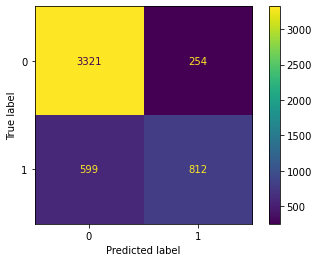

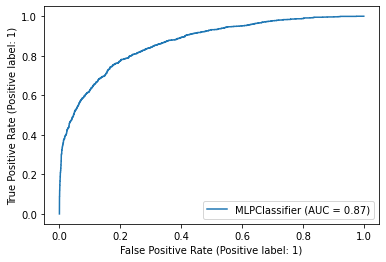

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3575
           1       0.76      0.58      0.66      1411

    accuracy                           0.83      4986
   macro avg       0.80      0.75      0.77      4986
weighted avg       0.82      0.83      0.82      4986



In [73]:
eval_model(best_grid,x_train,y_train,ytrain_predict)

## Prediction & Evaluation on Test Data

Accuracy: 0.8143124415341441
Recall: 0.5670926517571885


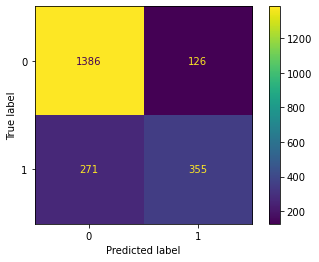

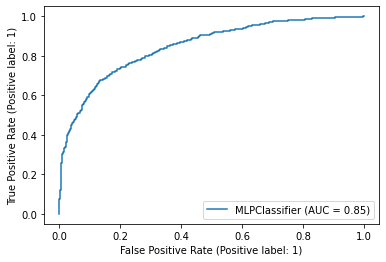

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1512
           1       0.74      0.57      0.64       626

    accuracy                           0.81      2138
   macro avg       0.79      0.74      0.76      2138
weighted avg       0.81      0.81      0.81      2138



In [74]:
eval_model(best_grid,x_test,y_test,ytest_predict)

# Conclusion

AUC on the training data is 86% and on test data is 84%. The precision and recall metrics are also almost similar between training and test set, which indicates no overfitting or underfitting has happened. 
  
best_grid model has better improved performance over the initial clf model as the sensitivity was much lesser in the initial model.

The Overall model performance is moderate enough to start predicting if any new customer will churn or not. 